# Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.datetime import DatetimeFeatures
from feature_engine.encoding import MeanEncoder,CountFrequencyEncoder
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer,
    OrdinalEncoder,
    StandardScaler
)
warnings.filterwarnings("ignore")

# Display settings

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
#in this code we force sklean for generate our output in pandas format not in numpy 
# By default whatever we pass inside the sklear it produce output in numpy array

sklearn.set_config(transform_output='pandas')

# Read the Dataset 

In [4]:
path=r"F:\DATA_SCIENCE\Machile_learing_projects\Campusx_projects\Flight_Price_Prediction\Data\train.csv"
train=pd.read_csv(path)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [6]:
#split the data
x_train=train.drop(columns='price')
y_train=train.price.copy()

# Transformation Operations

## Airline

In [7]:
x_train.airline

0           Indigo
1         Air Asia
2           Indigo
3      Jet Airways
4        Air India
          ...     
635    Jet Airways
636         Indigo
637      Air India
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [8]:
x_train['airline'].unique()

array(['Indigo', 'Air Asia', 'Jet Airways', 'Air India',
       'Multiple Carriers', 'Vistara', 'Spicejet', 'Goair'], dtype=object)

In [9]:
air_transformer= Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("grouper",RareLabelEncoder(tol=0.1,replace_with='Other',n_categories=2)),
    ("encoder",OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])
air_transformer.fit_transform(x_train.loc[:,['airline']])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
635,0.0,0.0,1.0,0.0,0.0
636,0.0,1.0,0.0,0.0,0.0
637,1.0,0.0,0.0,0.0,0.0
638,0.0,0.0,1.0,0.0,0.0


# date_of_journey

In [15]:
x_train.date_of_journey

0      2019-06-12
1      2019-05-21
2      2019-04-01
3      2019-03-06
4      2019-03-15
          ...    
635    2019-05-24
636    2019-06-24
637    2019-03-24
638    2019-04-01
639    2019-06-09
Name: date_of_journey, Length: 640, dtype: object

In [22]:
#1st extract date time features
feature_to_extract=['month','week','day_of_week','day_of_year']
doj_transformer=Pipeline(steps=[
    ('dt',DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True,format='mixed')),
    ('scaler',MinMaxScaler())
])
doj_transformer.fit_transform(x_train.loc[:,['date_of_journey']])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,1.000000,0.882353,0.333333,0.872881
1,0.666667,0.705882,0.166667,0.686441
2,0.333333,0.294118,0.000000,0.262712
3,0.000000,0.058824,0.333333,0.042373
4,0.000000,0.117647,0.666667,0.118644
...,...,...,...,...
635,0.666667,0.705882,0.666667,0.711864
636,1.000000,1.000000,0.000000,0.974576
637,0.000000,0.176471,1.000000,0.194915
638,0.333333,0.294118,0.000000,0.262712


In [ ]:
x_train.date_of_journey

# Source and destination column
* group the rare items
* perfrom mean encoding
* power transformer
* Is north city

In [24]:
x_train.source

0         Delhi
1       Kolkata
2       Kolkata
3      Banglore
4       Chennai
         ...   
635    Banglore
636     Kolkata
637      Mumbai
638     Kolkata
639     Kolkata
Name: source, Length: 640, dtype: object

In [25]:
x_train.destination

0         Cochin
1       Banglore
2       Banglore
3      New Delhi
4        Kolkata
         ...    
635        Delhi
636     Banglore
637    Hyderabad
638     Banglore
639     Banglore
Name: destination, Length: 640, dtype: object

In [29]:
location_subset=x_train.loc[:,['source','destination']]
location_subset.head()

,source,destination
0,Delhi,Cochin
1,Kolkata,Banglore
2,Kolkata,Banglore
3,Banglore,New Delhi
4,Chennai,Kolkata


In [37]:
location_pipe1=Pipeline(steps=[
    ('grouper',RareLabelEncoder(tol=0.1,replace_with='Other',n_categories=2)),
    ('encoder',MeanEncoder()),
    ('scaler',PowerTransformer())
])
location_pipe1.fit_transform(location_subset,y_train)

,source,destination
0,1.044900,1.045374
1,-0.148333,-0.123302
2,-0.148333,-0.123302
3,-0.934779,-0.984821
4,-1.903416,-0.984821
...,...,...
635,-0.934779,-1.792718
636,-0.148333,-0.123302
637,-1.903416,-0.984821
638,-0.148333,-0.123302


In [39]:
np.union1d(
    x_train.source.unique(),
    x_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [46]:
# custom function transfromer for identifying the city is in north or not
def is_north(x):
    columns=x.columns.to_list()
    north_cities=['Delhi','Kolkata','Mumbai','New Delhi']
    return (
        x
        .assign(**{
            f"{col}_is_north":x.loc[:,col].isin(north_cities).astype(int)
            for col in columns})
        .drop(columns=columns)
    )
FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
635,0,1
636,1,0
637,1,0
638,1,0


In [48]:
location_transformer=FeatureUnion(transformer_list=[
    ('part1',location_pipe1),
    ('part2',FunctionTransformer(func=is_north))
])
location_transformer.fit_transform(location_subset,y_train)

,source,destination,source_is_north,destination_is_north
0,1.044900,1.045374,1,0
1,-0.148333,-0.123302,1,0
2,-0.148333,-0.123302,1,0
3,-0.934779,-0.984821,0,1
4,-1.903416,-0.984821,0,1
...,...,...,...,...
635,-0.934779,-1.792718,0,1
636,-0.148333,-0.123302,1,0
637,-1.903416,-0.984821,1,0
638,-0.148333,-0.123302,1,0


# Departure/Arival time
* Date time features extraction
* MinMax scaling
* Part of Day
* count encoding
* MinMax scaling

In [55]:
time_subset=x_train.loc[:,['dep_time',"arrival_time"]]
time_subset

,dep_time,arrival_time
0,02:00:00,07:45:00
1,22:40:00,10:40:00
2,17:15:00,19:50:00
3,08:00:00,07:40:00
4,11:40:00,13:55:00
...,...,...
635,07:10:00,10:10:00
636,15:30:00,18:05:00
637,15:00:00,16:25:00
638,18:55:00,18:15:00


In [60]:
time_pipe1=Pipeline(steps=[
    ("dt",DatetimeFeatures(features_to_extract=['hour','minute'])),
    ('scalr',MinMaxScaler())
])
time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.086957,0.000000,0.304348,0.818182
1,0.956522,0.727273,0.434783,0.727273
2,0.739130,0.272727,0.826087,0.909091
3,0.347826,0.000000,0.304348,0.727273
4,0.478261,0.727273,0.565217,1.000000
...,...,...,...,...
635,0.304348,0.181818,0.434783,0.181818
636,0.652174,0.545455,0.782609,0.090909
637,0.652174,0.000000,0.695652,0.454545
638,0.782609,1.000000,0.782609,0.272727


In [64]:
def part_of_day(x,morning=4,noon=12,eve=16,night=20):
    columns=x.columns.to_list()
    x_temp=x.assign(**{
    col:pd.to_datetime(x.loc[:,col]).dt.hour
    for col in columns
    })
    return (
    x_temp
    .assign(**{
        f"{col}_part_of_day":np.select(
            [x_temp.loc[:,col].between(morning,noon,inclusive='left'),
             x_temp.loc[:,col].between(noon,eve,inclusive='left'),
             x_temp.loc[:,col].between(eve,night,inclusive='left')],
            ['morning','afternoon','evening'],
            default='night'
        )
        for col in columns
    })
        .drop(columns=columns)
    )

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,night,morning
1,night,morning
2,evening,evening
3,morning,morning
4,morning,afternoon
...,...,...
635,morning,morning
636,afternoon,evening
637,afternoon,evening
638,evening,evening


In [68]:
time_pipe2=Pipeline(steps=[
    ('part',FunctionTransformer(func=part_of_day)),
    ('encoder',CountFrequencyEncoder()),
    ('scaler',MinMaxScaler())])
time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.159817,0.925532
1,0.159817,0.925532
2,0.191781,0.755319
3,1.000000,0.925532
4,1.000000,0.000000
...,...,...
635,1.000000,0.925532
636,0.000000,0.755319
637,0.000000,0.755319
638,0.191781,0.755319


In [69]:
time_transformer=FeatureUnion(transformer_list=[
    ('part1',time_pipe1),
    ('part12',time_pipe2)
])
time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.086957,0.000000,0.304348,0.818182,0.159817,0.925532
1,0.956522,0.727273,0.434783,0.727273,0.159817,0.925532
2,0.739130,0.272727,0.826087,0.909091,0.191781,0.755319
3,0.347826,0.000000,0.304348,0.727273,1.000000,0.925532
4,0.478261,0.727273,0.565217,1.000000,1.000000,0.000000
...,...,...,...,...,...,...
635,0.304348,0.181818,0.434783,0.181818,1.000000,0.925532
636,0.652174,0.545455,0.782609,0.090909,0.000000,0.755319
637,0.652174,0.000000,0.695652,0.454545,0.000000,0.755319
638,0.782609,1.000000,0.782609,0.272727,0.191781,0.755319


# Duration column

In [72]:
x_train.duration.head()

0     345
1     720
2     155
3    1420
4     135
Name: duration, dtype: int64

In [ ]:
# duration categories

In [91]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)
            

In [94]:
RBFPercentileSimilarity(percentiles=[0.4,0.8]).fit_transform(x_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,7.187782e-28,0.0,1.000000,1.000000
1,0.000000e+00,0.0,1.000000,1.000000
2,0.000000e+00,0.0,0.904837,0.904837
3,0.000000e+00,0.0,1.000000,1.000000
4,0.000000e+00,0.0,0.904837,0.904837
...,...,...,...,...
635,0.000000e+00,0.0,0.904837,0.904837
636,0.000000e+00,0.0,0.904837,0.904837
637,0.000000e+00,0.0,0.904837,0.904837
638,0.000000e+00,0.0,1.000000,1.000000


In [95]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [96]:

def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [103]:

duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

In [105]:
duration_transformer.fit_transform(x_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.339923,-0.106251,-0.126128,1.0,0,-0.607499
1,-0.339923,-0.106251,-0.126128,2.0,0,0.124703
2,-0.339923,-0.106251,-0.126128,0.0,0,-0.978481
3,-0.339923,-0.106251,-0.126128,2.0,1,1.491479
4,-0.339923,-0.106251,-0.126128,0.0,0,-1.017531
...,...,...,...,...,...,...
635,-0.336539,-0.106251,-0.126128,1.0,0,-0.929667
636,-0.339923,-0.106251,-0.126128,0.0,0,-0.978481
637,-0.339923,-0.106251,-0.126128,0.0,0,-1.115158
638,-0.339923,-0.106251,-0.126128,2.0,1,1.452429


# total_stops

In [106]:
x_train.total_stops

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
635    0.0
636    0.0
637    0.0
638    1.0
639    1.0
Name: total_stops, Length: 640, dtype: float64

In [107]:

def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))

In [109]:
total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(x_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1.0,0
1,1.0,0
2,0.0,1
3,1.0,0
4,0.0,1
...,...,...
635,0.0,1
636,0.0,1
637,0.0,1
638,1.0,0


# Additional info

In [110]:
x_train.additional_info

0                          No info
1                          No info
2                          No info
3                          No info
4                          No info
                  ...             
635    In-flight meal not included
636                        No info
637                        No info
638    In-flight meal not included
639                        No info
Name: additional_info, Length: 640, dtype: object

In [111]:

info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [112]:
info_pipe1.fit_transform(x_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,1.0,0.0,0.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,1.0,0.0,0.0


In [113]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [114]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [115]:

info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

In [116]:

info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(x_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No info,additional_info_Other,additional_info
0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,1
2,0.0,1.0,0.0,1
3,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1
...,...,...,...,...
635,1.0,0.0,0.0,1
636,0.0,1.0,0.0,1
637,0.0,1.0,0.0,1
638,1.0,0.0,0.0,1


# column Transformers

In [118]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(x_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No info,info__additional_info_Other,info__additional_info
0,0.0,1.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,1.044900,1.045374,1,0,0.086957,0.000000,0.304348,0.818182,0.159817,0.925532,-0.339923,-0.106251,-0.126128,1.0,0,-0.607499,1.0,0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.666667,0.705882,0.166667,0.686441,-0.148333,-0.123302,1,0,0.956522,0.727273,0.434783,0.727273,0.159817,0.925532,-0.339923,-0.106251,-0.126128,2.0,0,0.124703,1.0,0,0.0,1.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.333333,0.294118,0.000000,0.262712,-0.148333,-0.123302,1,0,0.739130,0.272727,0.826087,0.909091,0.191781,0.755319,-0.339923,-0.106251,-0.126128,0.0,0,-0.978481,0.0,1,0.0,1.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.000000,0.058824,0.333333,0.042373,-0.934779,-0.984821,0,1,0.347826,0.000000,0.304348,0.727273,1.000000,0.925532,-0.339923,-0.106251,-0.126128,2.0,1,1.491479,1.0,0,0.0,1.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.117647,0.666667,0.118644,-1.903416,-0.984821,0,1,0.478261,0.727273,0.565217,1.000000,1.000000,0.000000,-0.339923,-0.106251,-0.126128,0.0,0,-1.017531,0.0,1,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,1.0,0.0,0.0,0.666667,0.705882,0.666667,0.711864,-0.934779,-1.792718,0,1,0.304348,0.181818,0.434783,0.181818,1.000000,0.925532,-0.336539,-0.106251,-0.126128,1.0,0,-0.929667,0.0,1,1.0,0.0,0.0,1
636,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.974576,-0.148333,-0.123302,1,0,0.652174,0.545455,0.782609,0.090909,0.000000,0.755319,-0.339923,-0.106251,-0.126128,0.0,0,-0.978481,0.0,1,0.0,1.0,0.0,1
637,1.0,0.0,0.0,0.0,0.0,0.000000,0.176471,1.000000,0.194915,-1.903416,-0.984821,1,0,0.652174,0.000000,0.695652,0.454545,0.000000,0.755319,-0.339923,-0.106251,-0.126128,0.0,0,-1.115158,0.0,1,0.0,1.0,0.0,1
638,0.0,0.0,1.0,0.0,0.0,0.333333,0.294118,0.000000,0.262712,-0.148333,-0.123302,1,0,0.782609,1.000000,0.782609,0.272727,0.191781,0.755319,-0.339923,-0.106251,-0.126128,2.0,1,1.452429,1.0,0,1.0,0.0,0.0,1


# Feature Selection

In [123]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 


# Putting it all together

In [125]:

preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(x_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,dur__duration_rbf_25,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,1.0,0.0,0.882353,0.872881,1.044900,1.045374,-0.339923,1.0,0,-0.607499,1.0,0
1,0.0,0.0,0.705882,0.686441,-0.148333,-0.123302,-0.339923,2.0,0,0.124703,1.0,0
2,1.0,0.0,0.294118,0.262712,-0.148333,-0.123302,-0.339923,0.0,0,-0.978481,0.0,1
3,0.0,1.0,0.058824,0.042373,-0.934779,-0.984821,-0.339923,2.0,1,1.491479,1.0,0
4,0.0,0.0,0.117647,0.118644,-1.903416,-0.984821,-0.339923,0.0,0,-1.017531,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,1.0,0.705882,0.711864,-0.934779,-1.792718,-0.336539,1.0,0,-0.929667,0.0,1
636,1.0,0.0,1.000000,0.974576,-0.148333,-0.123302,-0.339923,0.0,0,-0.978481,0.0,1
637,0.0,0.0,0.176471,0.194915,-1.903416,-0.984821,-0.339923,0.0,0,-1.115158,0.0,1
638,0.0,1.0,0.294118,0.262712,-0.148333,-0.123302,-0.339923,2.0,1,1.452429,1.0,0


# Visualizations

In [126]:

feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.006050987874211988,
 'air__airline_Indigo': 0.11755995824526073,
 'air__airline_Jet Airways': 0.15086554734416782,
 'air__airline_Multiple Carriers': 0.010183445619142417,
 'air__airline_Other': 0.08906830359379962,
 'doj__date_of_journey_month': 0.061898004217155154,
 'doj__date_of_journey_week': 0.10031369512647333,
 'doj__date_of_journey_day_of_week': -0.014656314883663221,
 'doj__date_of_journey_day_of_year': 0.12944281152553472,
 'location__source': 0.18327414344298712,
 'location__destination': 0.1663002706626158,
 'location__source_is_north': 0.03420802893556507,
 'location__destination_is_north': 0.03420802893556507,
 'time__dep_time_hour': -0.003096299114956421,
 'time__dep_time_minute': -0.035981479690798866,
 'time__arrival_time_hour': 0.08992629261150194,
 'time__arrival_time_minute': 0.04921137275901347,
 'time__dep_time_part_of_day': -0.013839085606149623,
 'time__arrival_time_part_of_day': 0.03381883369980069,
 'dur__duration_rbf_25': 0.1129

In [127]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_minute': -0.035981479690798866,
 'doj__date_of_journey_day_of_week': -0.014656314883663221,
 'time__dep_time_part_of_day': -0.013839085606149623,
 'dur__duration_rbf_75': -0.009648977813701073,
 'air__airline_Air India': -0.006050987874211988,
 'info__additional_info_In-flight meal not included': -0.0057166893062373285,
 'info__additional_info': -0.005525136250768965,
 'time__dep_time_hour': -0.003096299114956421,
 'dur__duration_rbf_50': -0.00213958768543987,
 'info__additional_info_No info': -0.00030722389412577805,
 'air__airline_Multiple Carriers': 0.010183445619142417,
 'info__additional_info_Other': 0.020200448005820253,
 'time__arrival_time_part_of_day': 0.03381883369980069,
 'location__source_is_north': 0.03420802893556507,
 'location__destination_is_north': 0.03420802893556507,
 'time__arrival_time_minute': 0.04921137275901347,
 'doj__date_of_journey_month': 0.061898004217155154,
 'air__airline_Other': 0.08906830359379962,
 'time__arrival_time_hour': 0.0899262

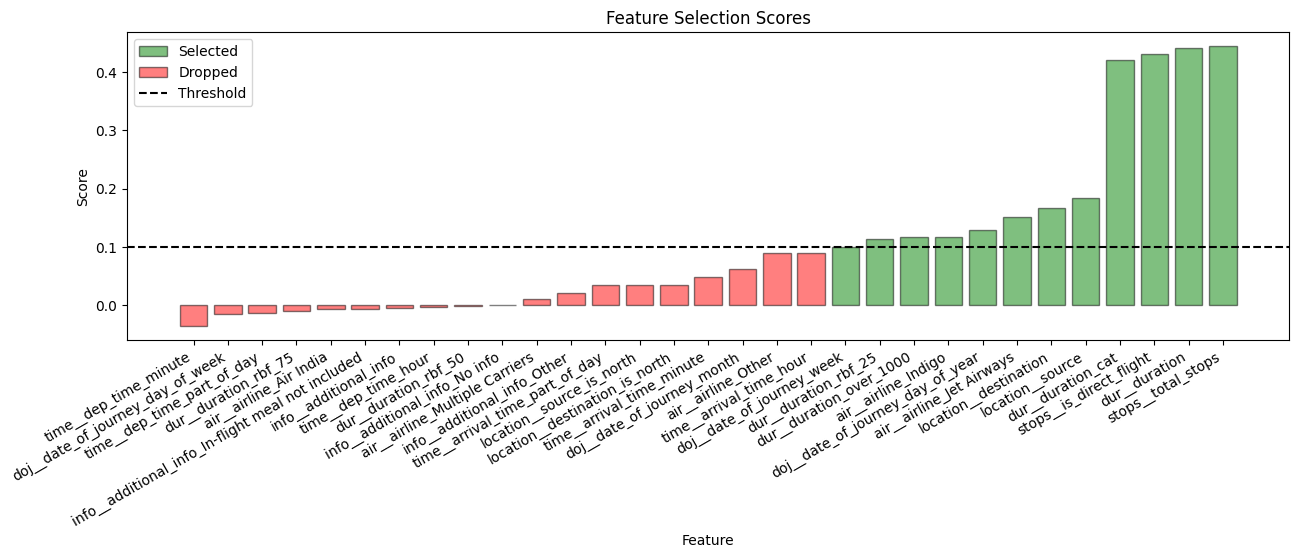

In [129]:
import matplotlib.pyplot as plt
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()
